In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer,KNNImputer
import warnings
import os
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 50.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires numpy<2.0a0,>=1.23, but you have numpy 2.1.1 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.1 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.1 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.22.4; python_version < "3.11", but you have numpy 2.1.1 which is incompatible.
pytensor 2.25.4 requires numpy<2,>

In [ ]:
df= pd.read_csv("House-Price.csv")

In [ ]:
df1=df

In [ ]:
df1

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,NaN,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006,1
502,20.6,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903,1
503,23.9,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,NaN,31,YES,0.057572,1
504,22.0,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,NaN,47,YES,0.060694,1


In [ ]:
df1.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,1.000000


In [ ]:
df1.airport.value_counts().sum()

506

In [ ]:
df1.waterbody.value_counts().sum()

351

In [ ]:
df1.waterbody.value_counts()

,count
waterbody,
River,183
Lake,97
Lake and River,71


In [ ]:
#Inference
#no null values in numerical columns but there are null values in waterbody column.n_hot_rooms have outliers

In [ ]:
#n_hosbeds using knn imputer
imputer=KNNImputer(n_neighbors=3)
n_hosbeds_array=df1["n_hos_beds"].values.reshape(-1, 1)
df1["n_hos_beds"] = imputer.fit_transform(n_hosbeds_array).ravel()

In [ ]:
cat_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
waterbody_array=df1["waterbody"].values.reshape(-1, 1)
df1["waterbody"] = cat_imputer.fit_transform(waterbody_array).ravel()

In [ ]:
df1

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,River,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006,1
502,20.6,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903,1
503,23.9,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,River,31,YES,0.057572,1
504,22.0,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,River,47,YES,0.060694,1


In [ ]:
#REmoving column bus_ter coz there is no variance
df1.drop('bus_ter',inplace=True,axis=1)

In [ ]:
"""So we done with imputing null values,now we will find the relation between feature variables and target
variables by uding various techniques of statistics"""

'So we done with imputing null values,now we will find the relation between feature variables and target\nvariables by uding various techniques of statistics'

In [ ]:
#Identify Categorical Variables
cat_cols = df1.select_dtypes(include='object').columns

In [ ]:
# Step 3: ANOVA for Categorical Variables
anova_results = {}
for col in cat_cols:
    formula = f'price ~ C({col})'
    model = ols(formula, data=df1).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results[col] = anova_table

anova_results

{'airport':                   sum_sq     df          F    PR(>F)
 C(airport)   1423.815239    1.0  17.437047  0.000035
 Residual    41153.923496  504.0        NaN       NaN,
 'waterbody':                     sum_sq     df         F    PR(>F)
 C(waterbody)     96.744603    2.0  0.572757  0.564336
 Residual      42480.994132  503.0       NaN       NaN}

In [ ]:
#checking p-value to eleminate categorical fetaures
# p-value is 0.000035 for airport which indicatesa significant relationship
  #between the airport variable and the price.


In [ ]:
#checking p-value to eleminate categorical fetaures

'''p-value for airport is 0.000035 which a significant relationship
   between the airport variable and the price.'''

'''p-value for waterboady is 0.564336 which not significant relationship
   between the waterbody variable and the price.'''


'p-value for waterboady is 0.564336 which not significant relationship\n   between the waterbody variable and the price.'

In [ ]:
#Droping waterbody feature from the data
df1.drop('waterbody',inplace=True,axis=1)

In [ ]:
# One-hot encode the 'airport' feature
onehotencoder = OneHotEncoder(drop='first')
airport_encoded = onehotencoder.fit_transform(df1[['airport']]).toarray()
airport_encoded=airport_encoded.astype(int)

In [ ]:
# Assuming 'df1' was originally a Pandas DataFrame and you want to keep it that way
df1 = pd.DataFrame(df1)  # Convert the NumPy array back to a DataFrame

# Now you can use .join()
df1 = df1.join(pd.DataFrame(airport_encoded, columns=onehotencoder.get_feature_names_out(['airport'])))

In [ ]:
df1=df1.drop('airport',axis=1)
df1

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,airport_YES
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,5.480,11.1920,23,0.049347,0,1
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,7.332,12.1728,42,0.046146,1,0
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,7.394,101.1200,38,0.045764,0,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,9.268,11.2672,45,0.047151,0,1
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,8.824,11.2896,55,0.039474,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,9.348,12.1792,27,0.056006,1,0
502,20.6,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,6.612,13.1648,20,0.059903,1,1
503,23.9,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,5.478,12.1912,31,0.057572,1,0
504,22.0,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,7.940,15.1760,47,0.060694,1,1


In [ ]:
#scaler = StandardScaler()
column_names=['price','resid_area','air_qual','room_num','age','dist1','dist2','dist3','dist4','teachers','poor_prop','n_hos_beds','n_hot_rooms','rainfall','parks','Sold','airport_YES']
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)

In [ ]:
df1=pd.DataFrame(df1,columns=column_names)
df1.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,airport_YES
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-4.914821e-16,2.387199e-16,-1.965929e-16,-1.088282e-16,-1.474446e-16,1.123388e-16,1.685082e-16,-1.544658e-16,1.965929e-16,-1.235726e-15,-3.089316e-16,3.651010e-16,2.492517e-16,1.474446e-16,-2.668046e-16,-9.478584e-17,-5.616939e-17
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-1.910898e+00,-1.557842e+00,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.349189e+00,-1.285915e+00,-1.327227e+00,-1.377585e+00,-1.638828e+00,-1.531127e+00,-1.798280e+00,-5.701436e-01,-2.894238e+00,-1.992304e+00,-9.128709e-01,-1.108637e+00
25%,-5.999994e-01,-8.676906e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.079935e-01,-8.016986e-01,-8.160601e-01,-8.006057e-01,-8.065758e-01,-7.994200e-01,-8.478132e-01,-3.538180e-01,-8.944506e-01,-7.521710e-01,-9.128709e-01,-1.108637e+00
50%,-1.448642e-01,-2.110985e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.786663e-01,-2.937460e-01,-2.765602e-01,-2.617734e-01,-2.748590e-01,-1.812536e-01,4.320691e-02,-6.144792e-02,-1.454391e-02,-8.919429e-02,-9.128709e-01,9.020089e-01
75%,2.693906e-01,1.015999e+00,5.986790e-01,4.827678e-01,9.067981e-01,6.624917e-01,6.473905e-01,6.832067e-01,6.513803e-01,4.880391e-01,6.030188e-01,8.037172e-01,2.157515e-01,8.653628e-01,6.536120e-01,1.095445e+00,9.020089e-01
max,2.994751e+00,2.422565e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.963072e+00,3.940775e+00,3.947358e+00,3.967821e+00,2.707379e+00,3.548771e+00,2.033653e+00,1.682884e+01,1.665278e+00,3.036866e+00,1.095445e+00,9.020089e-01


In [ ]:
# Step 6: Checking for Multicollinearity
# Calculating VIF for each feature
X = df1.drop('price', axis=1)  # Replace 'Target_Variable' with the actual target column name
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

        feature         VIF
0    resid_area    3.204235
1      air_qual    8.904394
2      room_num    1.806001
3           age    3.010191
4         dist1  318.776952
5         dist2  362.999738
6         dist3  347.278364
7         dist4   98.371509
8      teachers    1.338711
9     poor_prop    2.713889
10   n_hos_beds    1.042690
11  n_hot_rooms    1.024207
12     rainfall    1.031769
13        parks    6.305496
14         Sold    1.053029
15  airport_YES    1.065892


In [ ]:
#Dropping columns or features having VIF>5
df1=df1.drop(['air_qual','dist1','dist2','dist3','dist4','parks','age',],axis=1)
df1

,price,resid_area,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,Sold,airport_YES
0,0.160376,-1.287909,0.413672,-0.120013,1.459000,-1.075562,-1.653421,-0.353398,-1.294408,-0.912871,0.902009
1,-0.101258,-0.593381,0.194274,0.367166,0.303094,-0.492439,-0.387954,-0.166000,0.225431,1.095445,-1.108637
2,1.326830,-0.593381,1.282714,-0.265812,0.303094,-1.208727,-0.345589,16.828839,-0.094535,-0.912871,-1.108637
3,1.185112,-1.306878,1.016303,-0.809889,-0.113032,-1.361517,0.934910,-0.339029,0.465405,-0.912871,0.902009
4,1.490352,-1.306878,1.228577,-0.511180,-0.113032,-1.026501,0.631526,-0.334750,1.265320,-0.912871,-1.108637
...,...,...,...,...,...,...,...,...,...,...,...
501,-0.014047,0.115738,0.439316,0.018673,-1.176466,-0.418147,0.989574,-0.164777,-0.974442,1.095445,-1.108637
502,-0.210273,0.115738,-0.234548,0.288933,-1.176466,-0.500850,-0.879928,0.023538,-1.534383,1.095445,0.902009
503,0.149475,0.115738,0.984960,0.797449,-1.176466,-0.983048,-1.654788,-0.162484,-0.654476,1.095445,-1.108637
504,-0.057653,0.115738,0.725672,0.736996,-1.176466,-0.865302,0.027491,0.407812,0.625388,1.095445,0.902009


In [ ]:
df2=df1.drop(['dist1','dist2','dist3','dist4'],axis=1)

In [ ]:
df2

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,airport_YES
0,0.160376,-1.287909,-0.144217,0.413672,-0.120013,1.459000,-1.075562,-1.653421,-0.353398,-1.294408,-0.480763,-0.912871,0.902009
1,-0.101258,-0.593381,-0.740262,0.194274,0.367166,0.303094,-0.492439,-0.387954,-0.166000,0.225431,-0.782183,1.095445,-1.108637
2,1.326830,-0.593381,-0.740262,1.282714,-0.265812,0.303094,-1.208727,-0.345589,16.828839,-0.094535,-0.818115,-0.912871,-1.108637
3,1.185112,-1.306878,-0.835284,1.016303,-0.809889,-0.113032,-1.361517,0.934910,-0.339029,0.465405,-0.687571,-0.912871,0.902009
4,1.490352,-1.306878,-0.835284,1.228577,-0.511180,-0.113032,-1.026501,0.631526,-0.334750,1.265320,-1.410280,-0.912871,-1.108637
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.014047,0.115738,0.158124,0.439316,0.018673,-1.176466,-0.418147,0.989574,-0.164777,-0.974442,0.146086,1.095445,-1.108637
502,-0.210273,0.115738,0.158124,-0.234548,0.288933,-1.176466,-0.500850,-0.879928,0.023538,-1.534383,0.513037,1.095445,0.902009
503,0.149475,0.115738,0.158124,0.984960,0.797449,-1.176466,-0.983048,-1.654788,-0.162484,-0.654476,0.293573,1.095445,-1.108637
504,-0.057653,0.115738,0.158124,0.725672,0.736996,-1.176466,-0.865302,0.027491,0.407812,0.625388,0.587494,1.095445,0.902009


In [ ]:
df1

,price,resid_area,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,Sold,airport_YES
0,0.160376,-1.287909,0.413672,-0.120013,1.459000,-1.075562,-1.653421,-0.353398,-1.294408,-0.912871,0.902009
1,-0.101258,-0.593381,0.194274,0.367166,0.303094,-0.492439,-0.387954,-0.166000,0.225431,1.095445,-1.108637
2,1.326830,-0.593381,1.282714,-0.265812,0.303094,-1.208727,-0.345589,16.828839,-0.094535,-0.912871,-1.108637
3,1.185112,-1.306878,1.016303,-0.809889,-0.113032,-1.361517,0.934910,-0.339029,0.465405,-0.912871,0.902009
4,1.490352,-1.306878,1.228577,-0.511180,-0.113032,-1.026501,0.631526,-0.334750,1.265320,-0.912871,-1.108637
...,...,...,...,...,...,...,...,...,...,...,...
501,-0.014047,0.115738,0.439316,0.018673,-1.176466,-0.418147,0.989574,-0.164777,-0.974442,1.095445,-1.108637
502,-0.210273,0.115738,-0.234548,0.288933,-1.176466,-0.500850,-0.879928,0.023538,-1.534383,1.095445,0.902009
503,0.149475,0.115738,0.984960,0.797449,-1.176466,-0.983048,-1.654788,-0.162484,-0.654476,1.095445,-1.108637
504,-0.057653,0.115738,0.725672,0.736996,-1.176466,-0.865302,0.027491,0.407812,0.625388,1.095445,0.902009


In [ ]:
# Splitting the Data
X = df1.drop('price', axis=1)
y = df1['price']


In [ ]:
X = df2.drop('price', axis=1)
y = df2['price']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the model
model = LinearRegression()

In [ ]:
# Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse,r2)

0.2678618861319355 0.6943567764707912


In [ ]:
#Checking the Assumption of Regression
import seaborn as sns

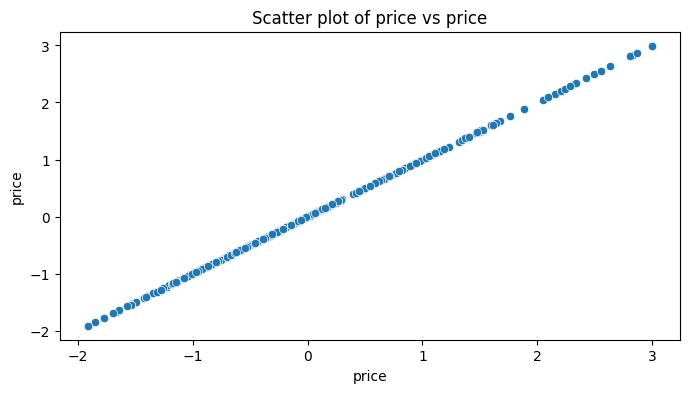

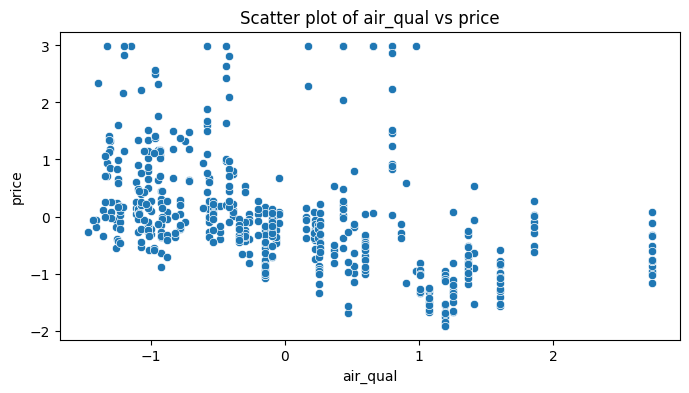

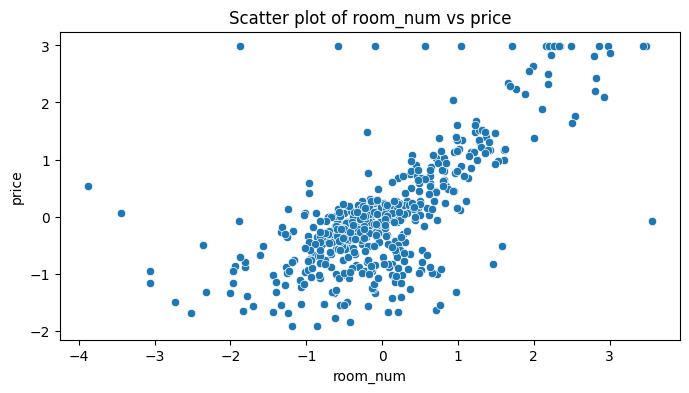

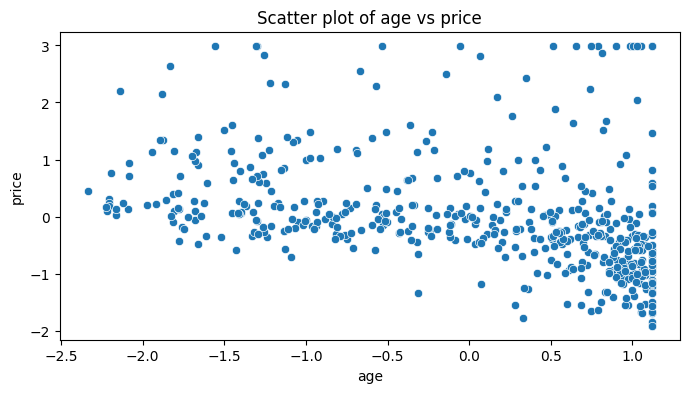

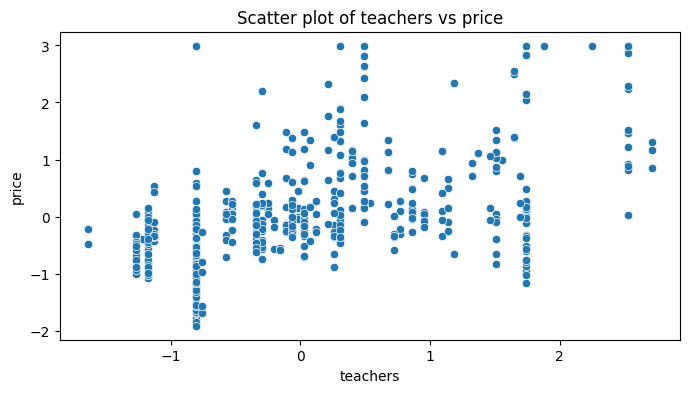

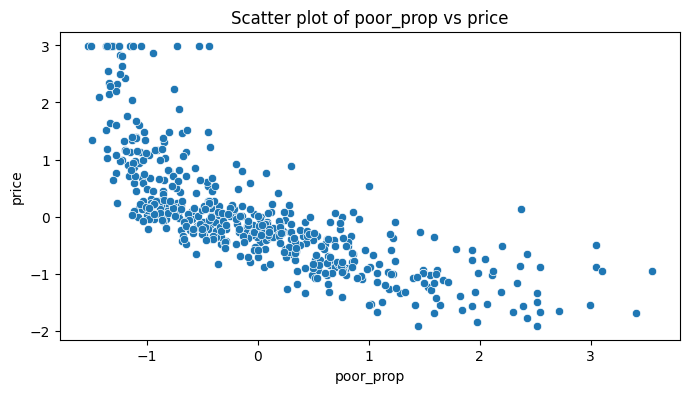

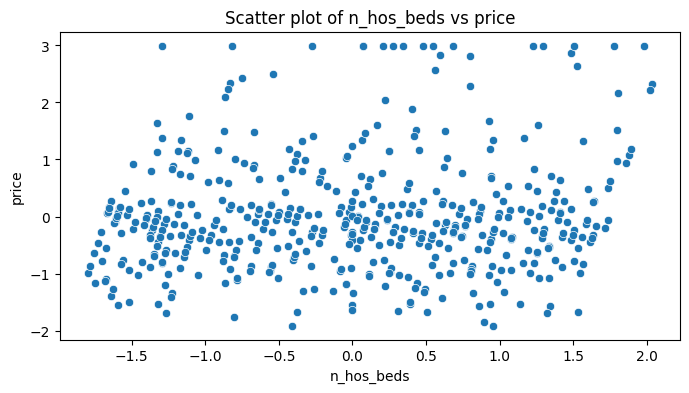

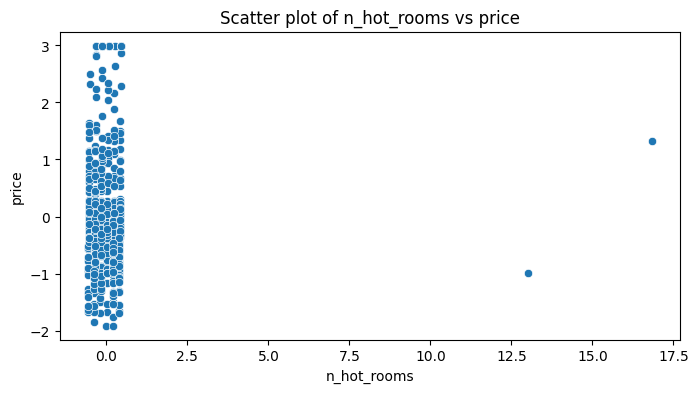

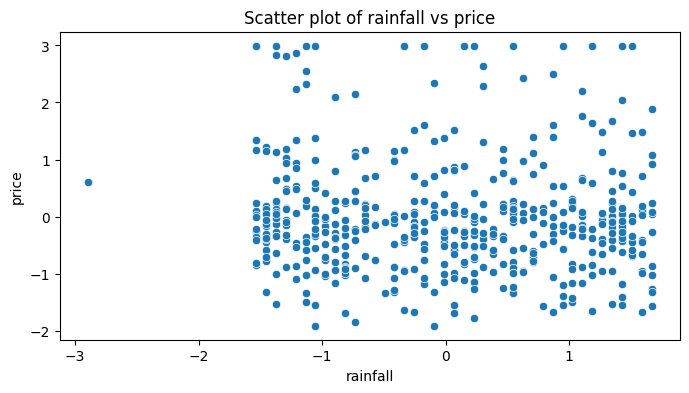

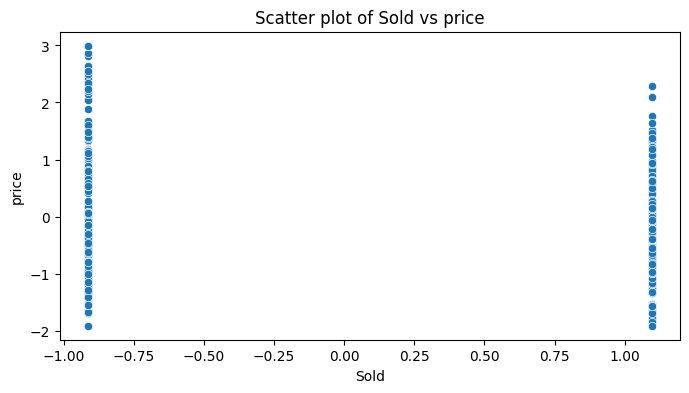

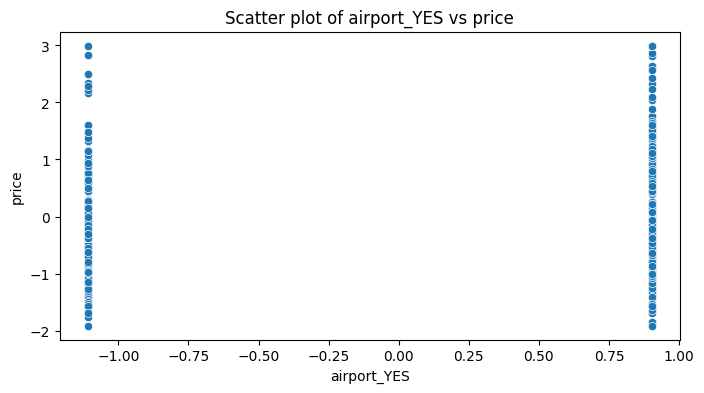

In [ ]:
#Linearity
for column in df2.columns:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df2[column], y=df2.price)
    plt.title(f'Scatter plot of {column} vs price')
    plt.show()

In [ ]:
residuals=y_test-y_pred

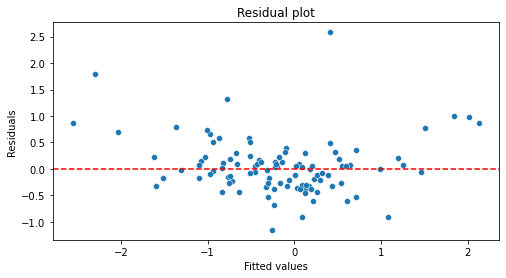

In [ ]:
# Residual plot #HOmoscedasticity
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_pred,y=residuals)
plt.axhline(0, linestyle='--', color='r')
plt.title('Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# 3. Independence: Durbin-Watson statistic
durbin_watson = sm.stats.stattools.durbin_watson(residuals)
print(f'Durbin-Watson statistic: {durbin_watson}')

Durbin-Watson statistic: 1.9188107650933108


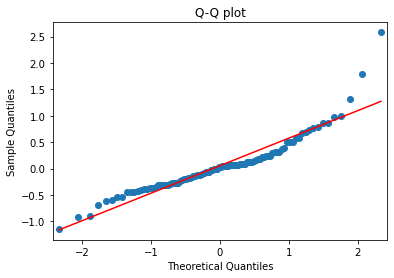

In [ ]:
# 4. Normality: Q-Q plot and Shapiro-Wilk test
sm.qqplot(residuals, line='s')
plt.title('Q-Q plot')
plt.show()

In [ ]:
from scipy.stats import shapiro
shapiro_test = shapiro(residuals)
print(f'Shapiro-Wilk test: {shap+iro_test}')

Shapiro-Wilk test: ShapiroResult(statistic=0.8988130688667297, pvalue=1.012209281725518e-06)


In [ ]:
# 5. Multicollinearity: Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

       feature       VIF
0   resid_area  2.110703
1     room_num  1.783317
2          age  2.100751
3     teachers  1.257682
4    poor_prop  2.654380
5   n_hos_beds  1.015741
6  n_hot_rooms  1.014895
7     rainfall  1.014174
8         Sold  1.035228
9  airport_YES  1.053894
